In [1]:
import sys;sys.path.insert(0,'/home/cm/Documents/srtm/')
import srtmlib as srtm

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from matplotlib.colors import LightSource
def save_image(data, cm, fn,deg=90,show = False):

    ls = LightSource(azdeg=deg, altdeg=45)
    
    sizes = np.shape(data)
    height = float(sizes[0])
    width = float(sizes[1])

    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    data_shaded = ls.hillshade(data.astype('float'), vert_exag=0.2)
    ax.imshow(data_shaded, cmap=cm)
    if show:
        plt.show()
    else:
#         plt.savefig(fn, dpi = height) 
        plt.savefig(fn, dpi = 180) 
#     plt.close()

# TEST MOSAIC

In [4]:
# path = '/home/cm/Documents/cm/srtm/srtmlib/data/everest/'
path = '/home/cm/Documents/cm/srtm/srtmlib/data/sample/'
# path = '/home/cm/Documents/cm/srtm/srtmlib/data/guadaloupe/'
m = srtm.Mosaic(path)
m.read_dir()
m.build_bil_set()
m.mosaic_print_structure()
m.load_tiles()
m.merge_tiles()
# print(m.mosaic_files)
print(m.tile_positions)

Exploring /home/cm/Documents/cm/srtm/srtmlib/data/sample/
n45_w123_1arc_v3.bil  FOUND
n45_w122_1arc_v3.bil  FOUND
n46_w123_1arc_v3.bil  FOUND
n46_w122_1arc_v3.bil  FOUND
n47_w123_1arc_v3.bil  FOUND
n47_w122_1arc_v3.bil  FOUND
-------
██
██
██
-------
{'n45_w122_1arc_v3.bil': [2, 1], 'n47_w123_1arc_v3.bil': [0, 0], 'n45_w123_1arc_v3.bil': [2, 0], 'n47_w122_1arc_v3.bil': [0, 1], 'n46_w122_1arc_v3.bil': [1, 1], 'n46_w123_1arc_v3.bil': [1, 0]}


In [5]:
h = m.data
h.shape

(10800, 7200)

In [6]:
print(h.max())
h[h > 8900] = 0
print(h.max())

65535
4384


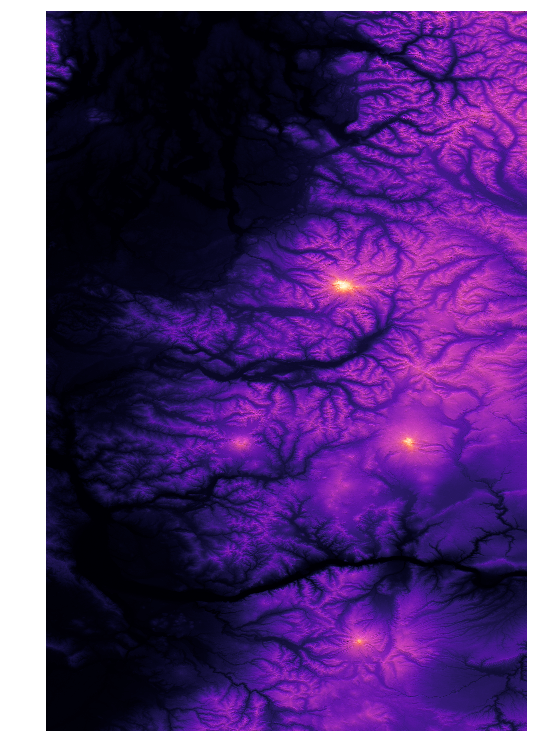

In [7]:
from matplotlib.colors import LightSource

data = h
cm='gray'
# cm = 'jet'
dst = '/home/cm/Desktop/sample.png'
deg = 0

ls = LightSource(azdeg=deg, altdeg=45)
sizes = np.shape(data)
height = float(sizes[0])
width = float(sizes[1])

fig = plt.figure()
# fig.set_size_inches(width/height, 1, forward=False)
fig.set_size_inches(20, 10, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# data_hillshade = ls.hillshade(data.astype('float'), vert_exag=0.2)
# ax.imshow(data_shaded, cmap=cm)

data_hillshade = ls.shade(data, cmap= plt.cm.magma, blend_mode='overlay', vert_exag=0.01)
ax.imshow(data_hillshade)
plt.show( )
# plt.savefig(dst, dpi = 3000) 

# TEST TILE

In [ ]:
data = '/home/cm/Documents/cm/srtm/srtmlib/data/everest/n27_e086_1arc_v3.bil'
b = srtm.Tile(data,1,0,0)
b.load_data(wrapped=False)
h = b.heights
print(b.src_file)
print(h.shape)

In [ ]:
print(h.max())
h[h > 8900] = 0
print(h.max())

In [ ]:
save_image(h,'gray','/home/cm/Desktop/map.png',show=True)

In [ ]:
sub =  h[0:100,0:100]

In [ ]:
save_image(sub,'gray','/home/cm/Desktop/map.png',show=True)

In [ ]:

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)

plt.show()